In [228]:
import pandas as pd
import json

In [229]:
start_urls = []
with open('C:/Users/namor/OneDrive/Documents/simplon/Data IA/Projets/Projet 6/notebook/data_harvest.json','r') as sample:
    for line in sample:
        start_urls.append(json.loads(line.strip()))

In [230]:
start_urls

[{'url': 'https://www.paruvendu.fr/a/voiture-occasion/citroen/ds3/1260287851A1KVVOCIDS3',
  'status': 200,
  'location': 'le thuit-signol (27370)',
  'version': 'version ds3 puretech 82 bvm chic',
  'price': 'prix 11 000 €',
  'year': "année novembre 2015 le comparateur d'assurance pour cette citroën ds3",
  'mileage': 'kilométrage 46 000 km',
  'fuel_type': 'energie essence',
  'emission': 'emissions de co2 104 g/km',
  'fuel_usage': 'consommation mixte 4.5 litres / 100 km',
  'transmission': 'transmission manuelle',
  'door_nb': 'nombre de places 5 places',
  'technical_power': 'puissance fiscale 4 cv',
  'seat_nb': 'N/A',
  'actual_power': '82',
  'body_colour': 'N/A',
  'body_type': 'berline',
  'warranty': 'N/A',
  'control': 'N/A'},
 {'url': 'https://www.paruvendu.fr/a/voiture-occasion/mini/cooper/1260329381A1KVVOMCCOO',
  'status': 200,
  'location': '68000 colmar',
  'version': 'version 1.5 d 116 cooper pack chili bva',
  'price': 'prix 18 490 €',
  'year': "année octobre 2017 

In [231]:
data = pd.DataFrame.from_dict(start_urls).iloc[:, 2:]

In [291]:
df = data.copy()

In [292]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type,warranty,control
0,le thuit-signol (27370),version ds3 puretech 82 bvm chic,prix 11 000 €,année novembre 2015 le comparateur d'assurance...,kilométrage 46 000 km,energie essence,emissions de co2 104 g/km,consommation mixte 4.5 litres / 100 km,transmission manuelle,nombre de places 5 places,puissance fiscale 4 cv,N/A,82,N/A,berline,N/A,N/A
1,68000 colmar,version 1.5 d 116 cooper pack chili bva,prix 18 490 €,année octobre 2017 le comparateur d'assurance ...,kilométrage 52 800 km,energie diesel,N/A,N/A,transmission automatique,nombre de places 5 places,puissance fiscale 6 cv,N/A,116,gris foncé,N/A,N/A,N/A
2,chorges (05230),version mini 1.6i - 120 cooper,prix 8 700 €,année juin 2009 le comparateur d'assurance pou...,kilométrage 83 700 km,energie essence,emissions de co2 129 g/km,consommation mixte 5.4 litres / 100 km,transmission manuelle,nombre de places 4 places,puissance fiscale 6 cv,N/A,120,gris foncé,berline,N/A,N/A
3,liévin (62800),version duster blue dci 115 4x2 prestige,prix 19 800 €,année janvier 2022 le comparateur d'assurance ...,kilométrage 2 000 km,energie diesel,N/A,N/A,transmission manuelle,nombre de places 5 places,puissance fiscale 6 cv,N/A,115,blanc,4x4,N/A,N/A
4,clermont-ferrand (63100),version duster dci 110 4x4 black touch,prix 16 000 €,année février 2017 le comparateur d'assurance ...,kilométrage 67 000 km,energie diesel,emissions de co2 123 g/km,consommation mixte 4.7 litres / 100 km,transmission manuelle,nombre de places 5 places,puissance fiscale 6 cv,N/A,110,N/A,4x4,N/A,N/A


## Pré-nettoyage

In [293]:
import re 
import numpy as np

columns = ['location', 'price', 'year', 'mileage', 'emission', 'fuel_usage', 'door_nb', 'technical_power']

for col in columns:  
    df[col] = df[col].apply(lambda x: re.sub("[^\d\.]", "", f"{x}")).replace('', np.nan)
    try:
        df[col] = df[col].astype('float64').astype('Int64')
    except:
        df[col] = df[col].astype('float64')

In [295]:
df['year'] = df['year'].astype('string').str[:4].astype('Int64')
# df['emission'] = df['emission'].astype('string').str[1:4].astype('float64')

In [303]:
df['emission'].astype('string').str[1:4].astype('float64')

TypeError: float() argument must be a string or a number, not 'NAType'

## Analyse de la forme des données

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type,warranty,control
0,27370,version ds3 puretech 82 bvm chic,11000,2015,46000,energie essence,2104,4.51,transmission manuelle,5,4,N/A,82,N/A,berline,N/A,N/A
1,68000,version 1.5 d 116 cooper pack chili bva,18490,2017,52800,energie diesel,<NA>,NaN,transmission automatique,5,6,N/A,116,gris foncé,N/A,N/A,N/A
2,5230,version mini 1.6i - 120 cooper,8700,2009,83700,energie essence,2129,5.41,transmission manuelle,4,6,N/A,120,gris foncé,berline,N/A,N/A
3,62800,version duster blue dci 115 4x2 prestige,19800,2022,2000,energie diesel,<NA>,NaN,transmission manuelle,5,6,N/A,115,blanc,4x4,N/A,N/A
4,63100,version duster dci 110 4x4 black touch,16000,2017,67000,energie diesel,2123,4.71,transmission manuelle,5,6,N/A,110,N/A,4x4,N/A,N/A


In [239]:
df.shape

(8269, 17)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         8265 non-null   Int64  
 1   version          8269 non-null   object 
 2   price            8258 non-null   Int64  
 3   year             8261 non-null   Int64  
 4   mileage          8265 non-null   Int64  
 5   fuel_type        8269 non-null   object 
 6   emission         4699 non-null   Int64  
 7   fuel_usage       1755 non-null   float64
 8   transmission     8269 non-null   object 
 9   door_nb          8225 non-null   Int64  
 10  technical_power  7894 non-null   Int64  
 11  seat_nb          8269 non-null   object 
 12  actual_power     8269 non-null   object 
 13  body_colour      8269 non-null   object 
 14  body_type        8269 non-null   object 
 15  warranty         8269 non-null   object 
 16  control          8269 non-null   object 
dtypes: Int64(7), f

In [241]:
df.dtypes.value_counts()

object     9
Int64      7
float64    1
dtype: int64

In [242]:
df.describe()

,location,price,year,mileage,emission,fuel_usage,door_nb,technical_power
count,8265.000000,8258.000000,8261.000000,8265.000000,4699.000000,1755.000000,8225.000000,7894.000000
mean,50606.116878,22717.762170,2016.721946,61677.887235,1906.694190,75.052298,18.771185,8.525336
std,26653.536977,15782.510292,4.592028,53568.195512,608.706699,607.070329,1267.980524,10.427626
min,1000.000000,1.000000,1965.000000,1.000000,2.000000,1.810000,2.000000,3.000000
25%,31270.000000,12990.000000,2015.000000,19182.000000,2109.000000,4.410000,5.000000,5.000000
50%,54400.000000,19299.500000,2018.000000,48952.000000,2122.000000,5.010000,5.000000,7.000000
75%,73300.000000,27637.250000,2020.000000,90275.000000,2139.000000,6.010000,5.000000,9.000000
max,97490.000000,199900.000000,2022.000000,396000.000000,2380.000000,8100.000000,115000.000000,560.000000


In [243]:
df.isna().sum()

location              4
version               0
price                11
year                  8
mileage               4
fuel_type             0
emission           3570
fuel_usage         6514
transmission          0
door_nb              44
technical_power     375
seat_nb               0
actual_power          0
body_colour           0
body_type             0
warranty              0
control               0
dtype: int64

<AxesSubplot:>

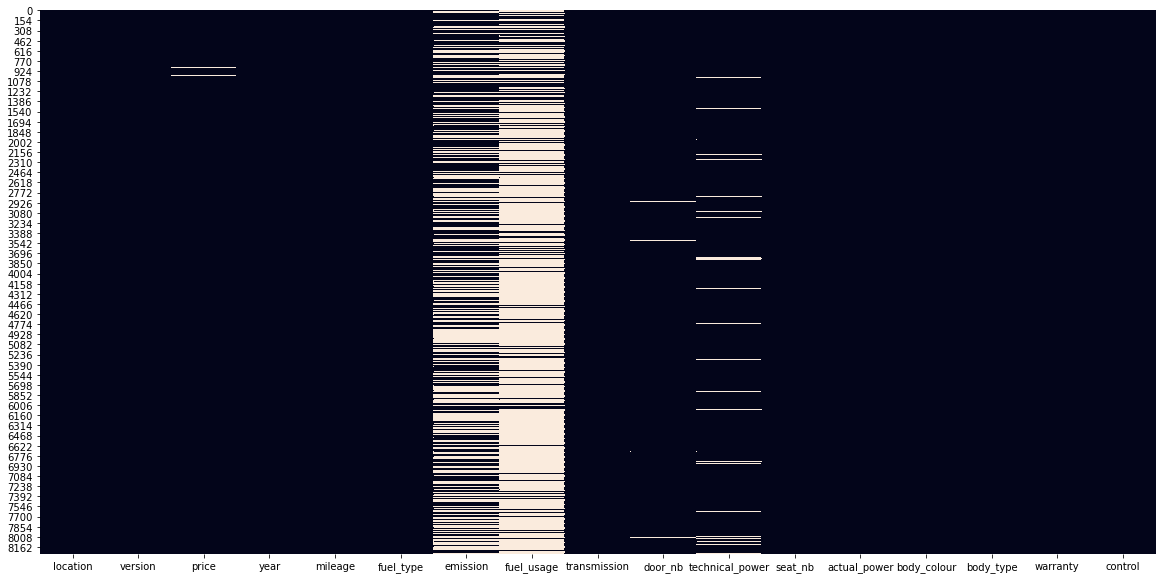

In [244]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [245]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

fuel_usage         0.787762
emission           0.431733
technical_power    0.045350
door_nb            0.005321
price              0.001330
year               0.000967
location           0.000484
mileage            0.000484
version            0.000000
fuel_type          0.000000
control            0.000000
warranty           0.000000
seat_nb            0.000000
actual_power       0.000000
body_colour        0.000000
body_type          0.000000
transmission       0.000000
dtype: float64

## Analyse du Fond
### Examen de la colonne target

In [246]:
df.head()

,location,version,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type,warranty,control
0,27370,version ds3 puretech 82 bvm chic,11000,2015,46000,energie essence,2104,4.51,transmission manuelle,5,4,N/A,82,N/A,berline,N/A,N/A
1,68000,version 1.5 d 116 cooper pack chili bva,18490,2017,52800,energie diesel,<NA>,NaN,transmission automatique,5,6,N/A,116,gris foncé,N/A,N/A,N/A
2,5230,version mini 1.6i - 120 cooper,8700,2009,83700,energie essence,2129,5.41,transmission manuelle,4,6,N/A,120,gris foncé,berline,N/A,N/A
3,62800,version duster blue dci 115 4x2 prestige,19800,2022,2000,energie diesel,<NA>,NaN,transmission manuelle,5,6,N/A,115,blanc,4x4,N/A,N/A
4,63100,version duster dci 110 4x4 black touch,16000,2017,67000,energie diesel,2123,4.71,transmission manuelle,5,6,N/A,110,N/A,4x4,N/A,N/A


In [247]:
df['price'].describe()

count      8258.000000
mean      22717.762170
std       15782.510292
min           1.000000
25%       12990.000000
50%       19299.500000
75%       27637.250000
max      199900.000000
Name: price, dtype: float64

In [248]:
df['version'].value_counts(normalize=True)

N/A                                                       0.104487
version 2.0l skyactiv-g 160 ch                            0.005442
version bluehdi 100 s s bvm6 gt                           0.002661
version privilege 1.4 boosterjet hybrid 129ch manuelle    0.002540
version 1.6 i-dtec 120 bvm6 2wd comfort                   0.002298
                                                            ...   
version (w205) 220 d 194ch amg line 9g-tronic             0.000121
version 1.0 tce - 100 v berline zen                       0.000121
version 208 1.2 puretech 110ch s&s bvm5 gt line           0.000121
version 350e 7gtronic 4matic executive 2017 5             0.000121
version 1.2 puretech 130ch allure s/s                     0.000121
Name: version, Length: 6059, dtype: float64

In [249]:
# # Some data
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# fracs = [15, 30, 45, 10]

# # Make figure and axes
# fig, axs = plt.subplots(1, 2)

# # A standard pie plot
# axs[0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# # Shift the second slice using explode
# axs[1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
#               explode=(0, 0.1, 0, 0))

# plt.show()

In [250]:
df['version'].value_counts()

N/A                                                       864
version 2.0l skyactiv-g 160 ch                             45
version bluehdi 100 s s bvm6 gt                            22
version privilege 1.4 boosterjet hybrid 129ch manuelle     21
version 1.6 i-dtec 120 bvm6 2wd comfort                    19
                                                         ... 
version (w205) 220 d 194ch amg line 9g-tronic               1
version 1.0 tce - 100 v berline zen                         1
version 208 1.2 puretech 110ch s&s bvm5 gt line             1
version 350e 7gtronic 4matic executive 2017 5               1
version 1.2 puretech 130ch allure s/s                       1
Name: version, Length: 6059, dtype: int64

<AxesSubplot:ylabel='year'>

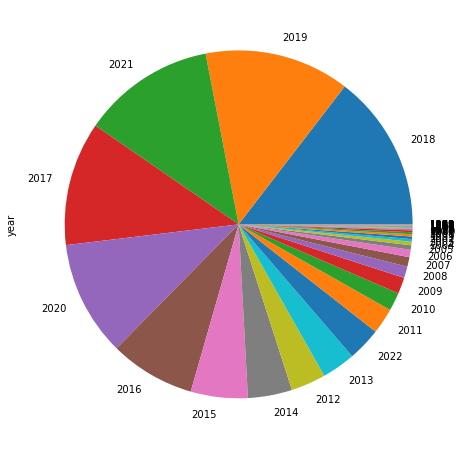

In [289]:
df['year'].value_counts().plot.pie()

<AxesSubplot:ylabel='fuel_type'>

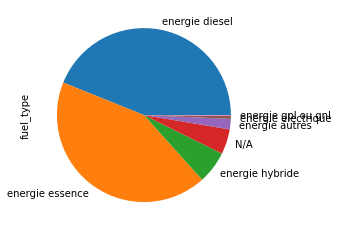

In [251]:
df['fuel_type'].value_counts().plot.pie()

<AxesSubplot:ylabel='price'>

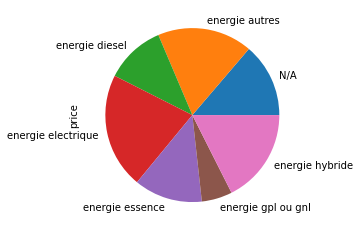

In [252]:
df.groupby('fuel_type')['price'].mean().plot.pie()

<AxesSubplot:ylabel='transmission'>

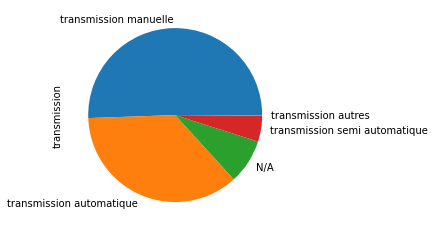

In [253]:
df['transmission'].value_counts().plot.pie()

<AxesSubplot:ylabel='price'>

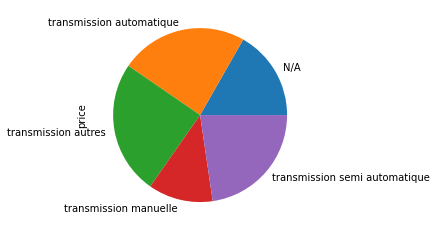

In [254]:
df.groupby('transmission')['price'].mean().plot.pie()

### Histogrames des variables continues

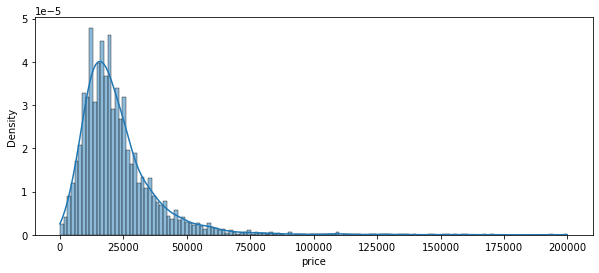

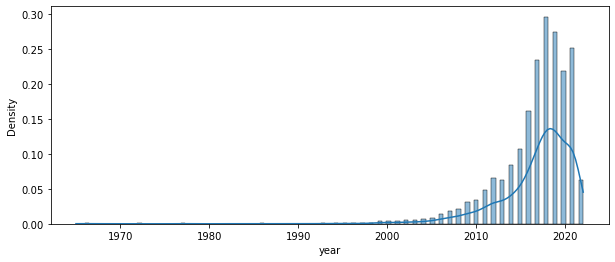

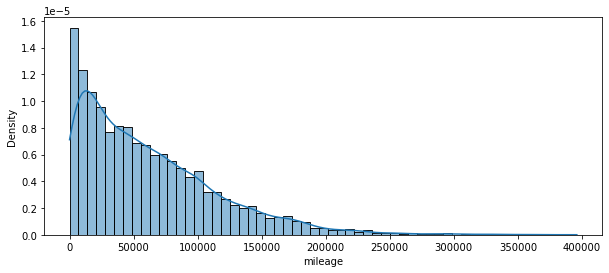

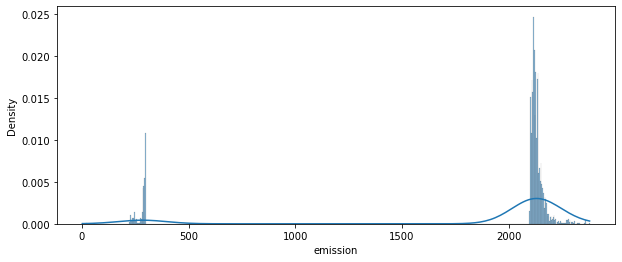

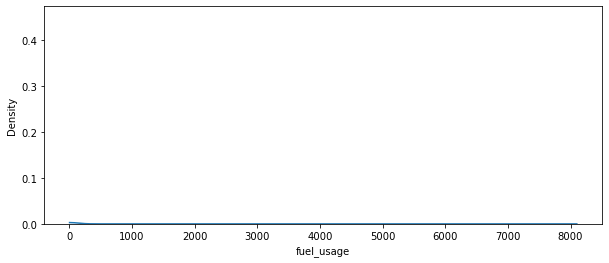

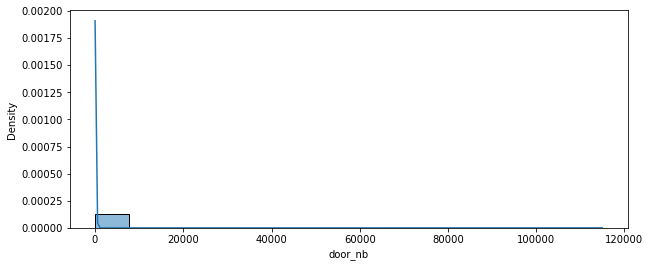

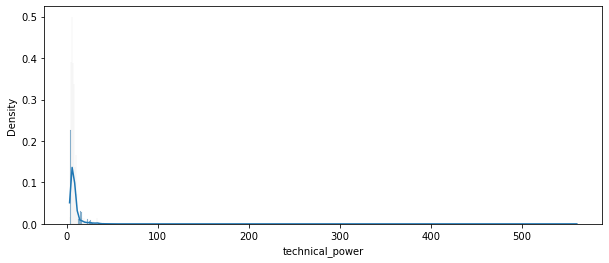

In [255]:
df_float = df[columns].astype('float64').iloc[:, 1:]
for col in df_float.select_dtypes('float64'):
    plt.figure(figsize=(10,4))
    sns.histplot(df_float[col], kde=True, stat='density')

### Relation Variables / Variables

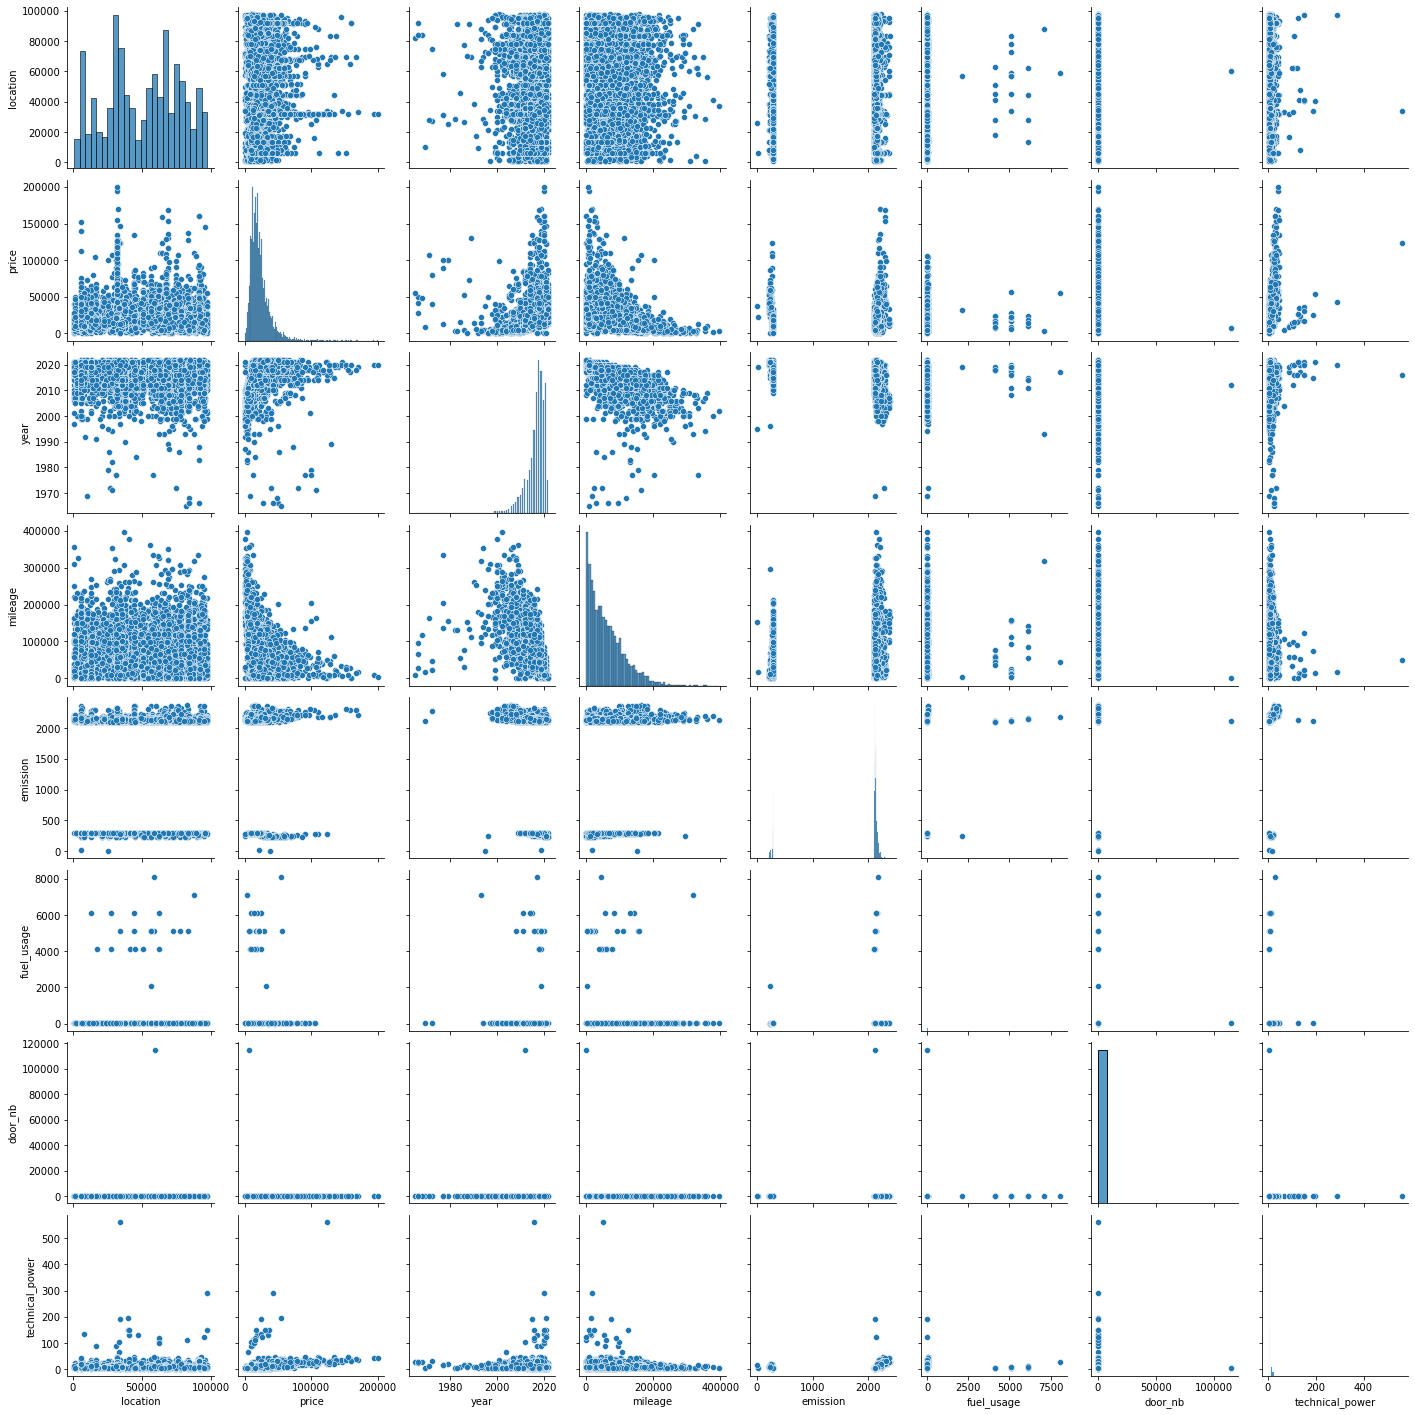

In [256]:
sns.pairplot(df)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

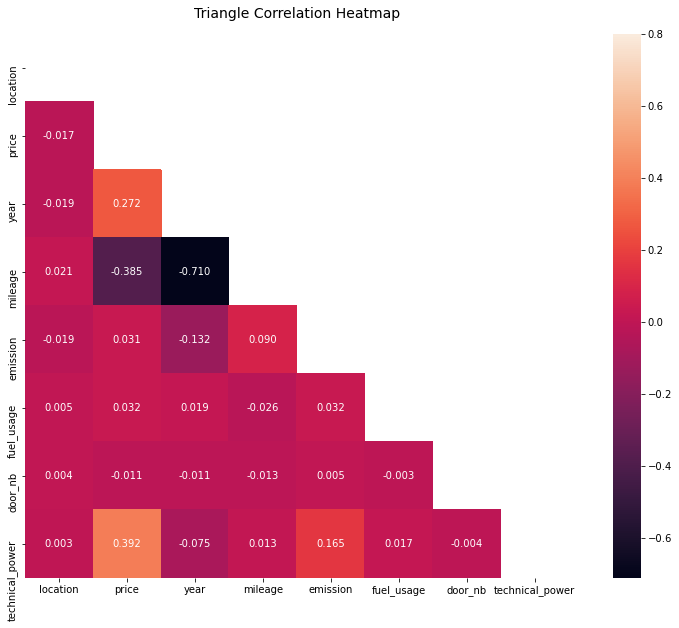

In [298]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16,10))
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, cbar=True, annot=True, fmt='.3f', annot_kws={'size': 10});
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

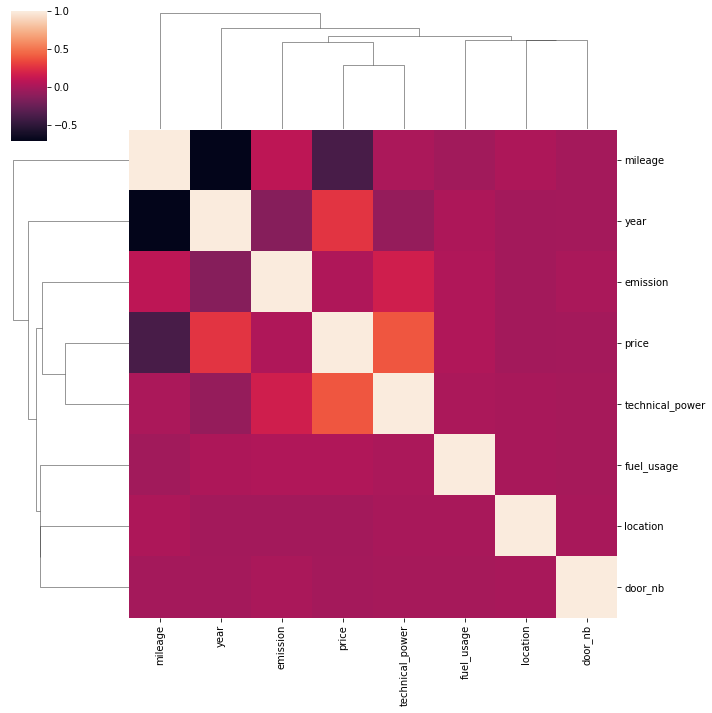

In [258]:
#correlation matrix
corrmat = df.corr()
sns.clustermap(corrmat, fmt='.1f');
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16)

In [274]:
df_scatter = df.copy()
df_scatter = df_scatter.dropna()

<AxesSubplot:xlabel='year', ylabel='price'>

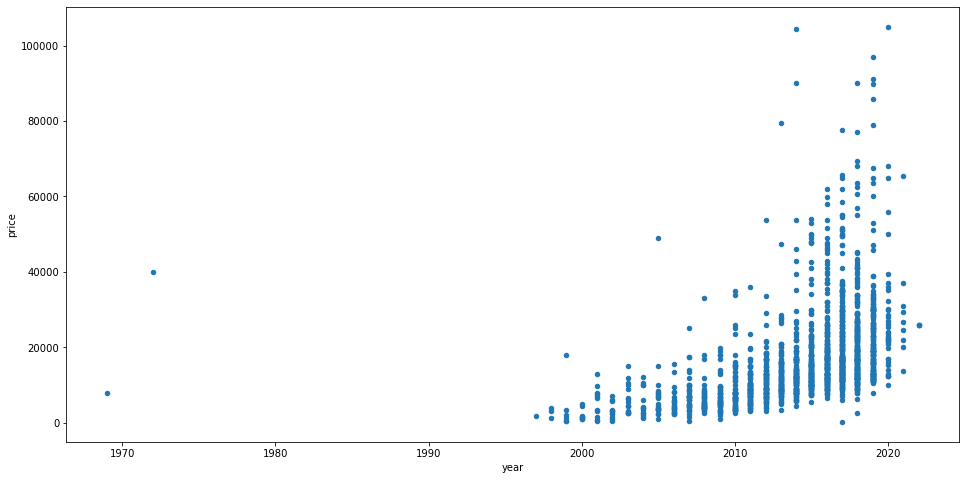

In [287]:
plt.rcParams["figure.figsize"] = (16,8)
df_scatter.plot.scatter(x = 'year', y = 'price')

<AxesSubplot:xlabel='mileage', ylabel='price'>

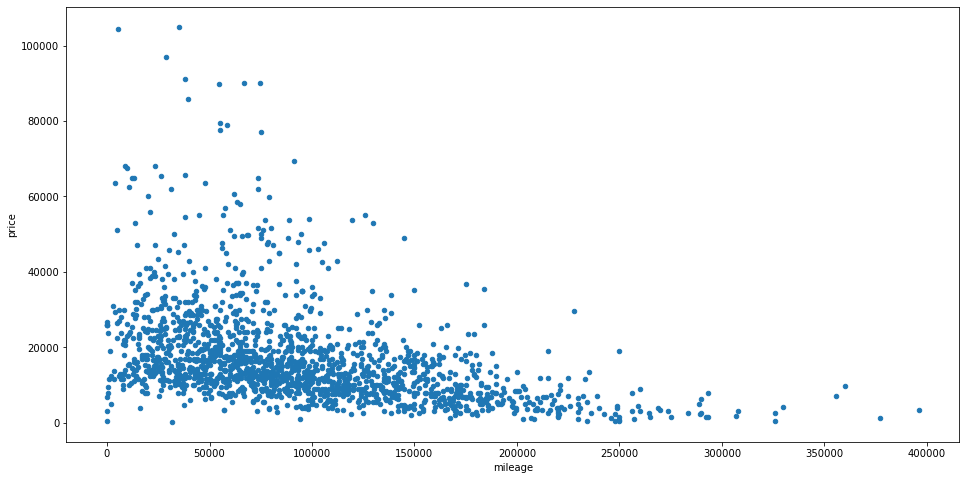

In [301]:
plt.rcParams["figure.figsize"] = (16,8)
df_scatter.plot.scatter(x = 'mileage', y = 'price')